# Comparison

In [1]:
import pandas as pd

In [2]:
demand_type = ['uniform', "seasonal", 'random']
opt_costs = [pd.read_csv('./'+demand+'/opt_cost.csv', index_col=0) for demand in demand_type]
base_costs = [pd.read_csv(demand+'/base_cost.csv', index_col=0) for demand in demand_type]

In [3]:
opt_costs = pd.concat(opt_costs, axis=1)
base_costs = pd.concat(base_costs, axis = 1)
opt_costs.columns = base_costs.columns = demand_type

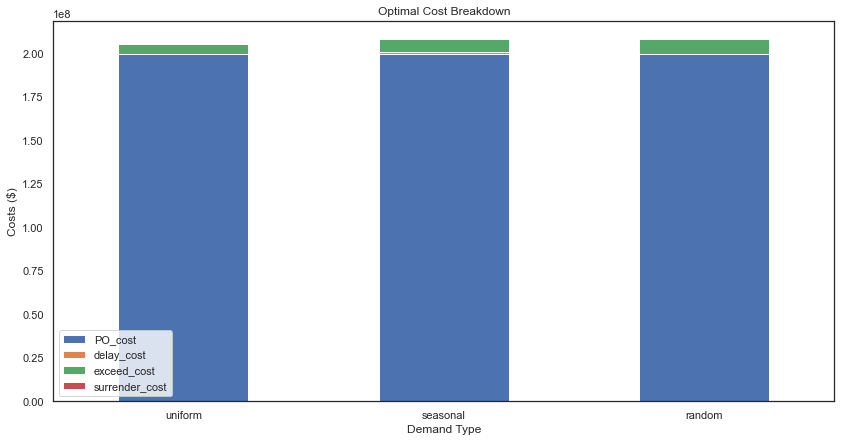

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(14, 7)})
sns.set_theme(style = "white")

ax = opt_costs.T.plot(kind='bar', stacked=True)

#specfiy axis labels
ax.set(xlabel='Demand Type',
       ylabel='Costs ($)',
       title='Optimal Cost Breakdown')

plt.xticks(rotation=0)

plt.savefig('plots/opt.jpg')

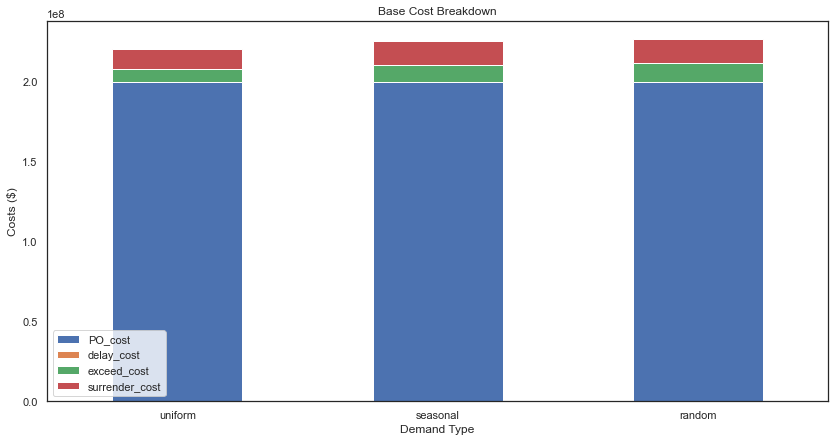

In [5]:
ax = base_costs.T.plot(kind='bar', stacked=True)

sns.set(rc={"figure.figsize":(14, 7)})
sns.set_theme(style = "white")

#specfiy axis labels
ax.set(xlabel='Demand Type',
       ylabel='Costs ($)',
       title='Base Cost Breakdown')

plt.xticks(rotation=0)

plt.savefig('plots/base.jpg')

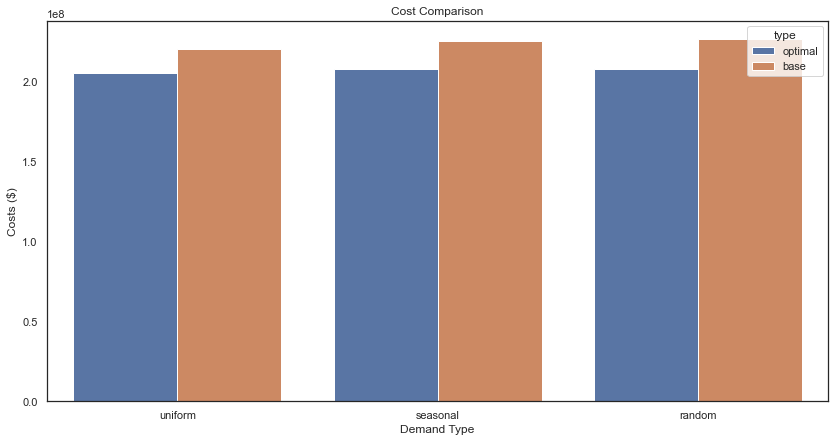

In [6]:
opt_costs['type'] = 'optimal'
base_costs['type'] = 'base'

costs = pd.concat([opt_costs, base_costs])

plot = costs.melt(id_vars = ['type'], var_name='demand_type', value_name='costs')

sns.set(rc={"figure.figsize":(14, 7)})
sns.set_theme(style = "white")
ax = sns.barplot(data=plot, y='costs', x='demand_type', hue='type', ci=None, estimator=sum)

#specfiy axis labels
ax.set(xlabel='Demand Type',
       ylabel='Costs ($)',
       title='Cost Comparison')

plt.savefig('plots/comp.jpg')

In [7]:
opt_costs

,uniform,seasonal,random,type
PO_cost,1.999447e+08,1.999237e+08,1.999008e+08,optimal
delay_cost,0.000000e+00,1.014487e+06,1.082315e+05,optimal
exceed_cost,5.512050e+06,7.481706e+06,8.152670e+06,optimal
surrender_cost,0.000000e+00,0.000000e+00,0.000000e+00,optimal


In [8]:
base_costs

,uniform,seasonal,random,type
PO_cost,1.999201e+08,1.998817e+08,1.998542e+08,base
delay_cost,0.000000e+00,0.000000e+00,0.000000e+00,base
exceed_cost,7.933488e+06,1.093456e+07,1.174204e+07,base
surrender_cost,1.284900e+07,1.490729e+07,1.537034e+07,base
